# CO2 Concentration

SOURCES:
- Hansen, J., M. Sato, P. Kharecha, D. Beerling, R. Berner, V. Masson-Delmotte, M. Pagani, M. Raymo, D.L. Royer, and J.C. Zachos, 2008: Target atmospheric CO2: Where should humanity aim? Open Atmos. Sci. J., 2, 217-231, doi:10.2174/1874282300802010217.
- https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide
- https://e360.yale.edu/features/how-the-world-passed-a-carbon-threshold-400ppm-and-why-it-matters
- IPCC AR5 (2014). Climate Change 2014: Synthesis Report.

DATA:
- Dr. Xin Lan, NOAA/GML (gml.noaa.gov/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/)
- https://gml.noaa.gov/ccgg/trends/data.html

Color zones:
- 280 ppm, Pre-industrial baseline (NOAA, Climate.gov)
- 350 ppm: highest possible Safe level (Hansen et al. 2008)
- 400 ppm: Dangerous threshold, crossed in 2013 (Yale Environment 360)
- 450 ppm: High risk level (likely more than 1.5°C warming) (IPPC AR5)
- 500 ppm: Critical danger zone (likely more than 2°C warming) (IPCC AR5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime
import matplotlib as mpl
mpl.rcParams['font.family'] = ['LCD']

# Load CO2 data
co2_data = pd.read_csv('data/co2_mm_mlo.csv', comment='#')
co2_data['co2_ppm'] = co2_data['average'].replace(-99.99, np.nan)
# Get current CO2 level
current_co2 = co2_data['co2_ppm'].iloc[-1]
current_date = co2_data['date'].iloc[-1] if 'date' in co2_data.columns else datetime.now().strftime('%Y-%m')

print(f"Current CO2 level: {current_co2:.2f} ppm")
print(f"Data as of: {current_date}")

Current CO2 level: 427.49 ppm
Data as of: 2026-01


In [2]:
colors = {'green': '#2dc937',
          'light_green': '#99c140',
          'yellow': '#e7b416',
          'orange': '#db7b2b',
          'red': '#cc3232',
          'gray': '#666666',
          'white': '#cccccc',
          'black': '#000000'
          }

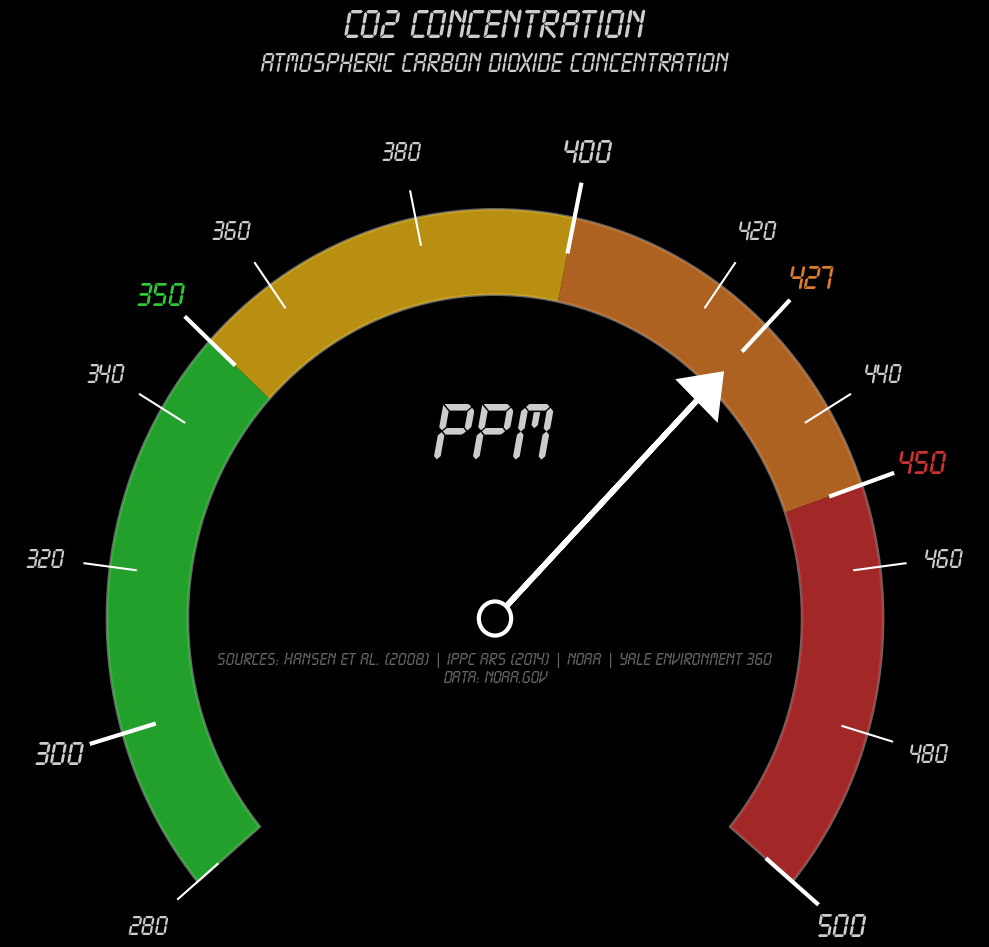

In [ ]:
fig, ax = plt.subplots(figsize=(10, 9.5), facecolor=colors['black'])
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.9, 1.5)
ax.axis('off')
ax.set_facecolor(colors['black'])

# Define color zones based on scientific thresholds
# Green: Safe zone (280-350 ppm)
# Yellow: Caution zone (350-400 ppm)  
# Orange: Warning zone (400-450 ppm)
# Red: Danger zone (450-500 ppm)

# Circle start & end
theta_start = -40  # Bottom left
theta_end = 220     # Bottom right

# Scale: 280 ppm to 500 ppm
co2_min = 280
co2_max = 500
co2_range = co2_max - co2_min

# Calculate angles for each zone
def co2_to_angle(co2_value):
    """Convert CO2 ppm to angle on gauge"""
    pct = (co2_value - co2_min) / co2_range
    return theta_end + pct * (theta_start - theta_end)

angle_350 = co2_to_angle(350)  # Safe limit
angle_400 = co2_to_angle(400)  # Dangerous threshold
angle_450 = co2_to_angle(450)  # High risk

# Background arc
bg_arc = Wedge((0, 0), 1.2, theta_start, theta_end, width=0.25,
               facecolor=colors['black'], edgecolor=colors['gray'], linewidth=2)
ax.add_patch(bg_arc)

# Green zone: 280-350 ppm (SAFE)
safe_arc = Wedge((0, 0), 1.2, angle_350, theta_end, width=0.25,
                 facecolor=colors['green'], edgecolor='none', alpha=0.8)
ax.add_patch(safe_arc)

# Yellow zone: 350-400 ppm (CAUTION)
caution_arc = Wedge((0, 0), 1.2, angle_400, angle_350, width=0.25,
                    facecolor=colors['yellow'], edgecolor='none', alpha=0.8)
ax.add_patch(caution_arc)

# Orange zone: 400-450 ppm (WARNING)
warning_arc = Wedge((0, 0), 1.2, angle_450, angle_400, width=0.25,
                    facecolor=colors['orange'], edgecolor='none', alpha=0.8)
ax.add_patch(warning_arc)

# Red zone: 450-500 ppm (DANGER)
danger_arc = Wedge((0, 0), 1.2, theta_start, angle_450, width=0.25,
                   facecolor=colors['red'], edgecolor='none', alpha=0.8)
ax.add_patch(danger_arc)

# Add tick marks and labels
major_ticks = [300, 350, 400, 450, 500]
tick_values = [280, 300, 320, 340, 350, 360, 380, 400, 420, 440, 450, 460, 480, 500]

for co2_val in tick_values:
    co2_val = int(co2_val)
    angle = co2_to_angle(co2_val)
    angle_rad = np.radians(angle)

    # Label position
    x_label = 1.4 * np.cos(angle_rad)
    y_label = 1.4 * np.sin(angle_rad)
    label_text = f'{co2_val}'
    label_color = colors['white']
    label_weight = 'normal'

    # Decide if major or minor tick
    if co2_val in major_ticks:
        tick_outer = 1.3
        tick_inner = 1.1
        tick_lw = 3
        label_size = 25
    else:
        tick_outer = 1.28
        tick_inner = 1.12
        tick_lw = 1.5
        label_size = 20

    if co2_val == 350:
        label_color = colors['green']
        label_weight = 'bold'
    elif co2_val == 450:
        label_color = colors['red']
        label_weight = 'bold'

    ax.text(
        x_label, y_label, label_text,
        ha='center', va='center',
        fontsize=label_size,
        color=label_color,
        fontweight=label_weight
    )

    # Draw tick mark
    x_outer = tick_outer * np.cos(angle_rad)
    y_outer = tick_outer * np.sin(angle_rad)
    x_inner = tick_inner * np.cos(angle_rad)
    y_inner = tick_inner * np.sin(angle_rad)

    ax.plot(
        [x_inner, x_outer], [y_inner, y_outer],
        color='white', linewidth=tick_lw
    )

# Needle pointing to current CO2
needle_angle = co2_to_angle(current_co2)
needle_rad = np.radians(needle_angle)
needle_x = 0.9 * np.cos(needle_rad)
needle_y = 0.9 * np.sin(needle_rad)

ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='white', ec='white', linewidth=4, zorder=2)

# Text & position of current value
x_outer = 1.3 * np.cos(needle_rad)
y_outer = 1.3 * np.sin(needle_rad)
x_inner = 1.1 * np.cos(needle_rad)
y_inner = 1.1 * np.sin(needle_rad)
x_label = 1.4 * np.cos(needle_rad)
y_label = 1.4 * np.sin(needle_rad)
ax.plot(
        [x_inner, x_outer], [y_inner, y_outer],
        color='white', linewidth=tick_lw
    )
ax.text(
        x_label, y_label, f'{current_co2:.0f}',
        ha='center', va='center',
        fontsize=25,
        color=colors['orange'],
        fontweight='bold'
    )

# Center hub
center = Circle((0, 0), 0.05, facecolor=colors['black'], 
                edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)

# Unit
ax.text(0, 0.55, 'PPM', fontsize=60, fontweight='bold',
        color=colors['white'], ha='center', va='center', zorder=1)

# Title
ax.text(0, 1.7, 'CO2 CONCENTRATION', fontsize=30,
        fontweight='bold', color=colors['white'], ha='center', va='bottom')
ax.text(0, 1.6, 'Atmospheric Carbon Dioxide Concentration', fontsize=20,
        color=colors['white'], ha='center', va='bottom', style='italic')


# Sources
sources_text = '''Sources: Hansen et al. (2008) | IPPC AR5 (2014) | NOAA | Yale Environment 360
Data: NOAA.gov'''
ax.text(0, -0.1, sources_text, fontsize=13, color=colors['gray'],
        ha='center', va='top', multialignment='center')

plt.tight_layout()
plt.savefig('visualizations/co2_rpm_tachometer.svg',
            bbox_inches='tight', facecolor=colors['black'], edgecolor='none')
plt.show()